In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [369]:
train_data_path = "data\\train.csv"
test_data_path = "data\\test.csv"

In [370]:
pd.options.display.max_columns = 80
main_df = pd.read_csv(train_data_path)
main_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [371]:
main_df = main_df.set_index("Id", drop=True)

In [372]:
columns = ["MSZoning",    "LotArea", "GrLivArea", "Utilities", 
           "LotConfig",   "BldgType", "HouseStyle", 
           "OverallQual", "YearBuilt", "YrSold", "ExterCond", 
           "TotalBsmtSF", "HeatingQC", "CentralAir",
           "TotRmsAbvGrd", "GarageType", "SaleType", "SalePrice"]
train_df = main_df[columns]
train_df.head(3)

,MSZoning,LotArea,GrLivArea,Utilities,LotConfig,BldgType,HouseStyle,OverallQual,YearBuilt,YrSold,ExterCond,TotalBsmtSF,HeatingQC,CentralAir,TotRmsAbvGrd,GarageType,SaleType,SalePrice
Id,,,,,,,,,,,,,,,,,,
1,RL,8450,1710,AllPub,Inside,1Fam,2Story,7,2003,2008,TA,856,Ex,Y,8,Attchd,WD,208500
2,RL,9600,1262,AllPub,FR2,1Fam,1Story,6,1976,2007,TA,1262,Ex,Y,6,Attchd,WD,181500
3,RL,11250,1786,AllPub,Inside,1Fam,2Story,7,2001,2008,TA,920,Ex,Y,6,Attchd,WD,223500


<h1 style="text-align: center">Data description</h1>

In [373]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1460 non-null   object
 1   LotArea       1460 non-null   int64 
 2   GrLivArea     1460 non-null   int64 
 3   Utilities     1460 non-null   object
 4   LotConfig     1460 non-null   object
 5   BldgType      1460 non-null   object
 6   HouseStyle    1460 non-null   object
 7   OverallQual   1460 non-null   int64 
 8   YearBuilt     1460 non-null   int64 
 9   YrSold        1460 non-null   int64 
 10  ExterCond     1460 non-null   object
 11  TotalBsmtSF   1460 non-null   int64 
 12  HeatingQC     1460 non-null   object
 13  CentralAir    1460 non-null   object
 14  TotRmsAbvGrd  1460 non-null   int64 
 15  GarageType    1379 non-null   object
 16  SaleType      1460 non-null   object
 17  SalePrice     1460 non-null   int64 
dtypes: int64(8), object(10)
memory usage: 216.7+ KB


In [374]:
# fill empty values for garage wth most freq. value
train_df["GarageType"] = train_df["GarageType"].fillna(train_df["GarageType"].value_counts().iloc[0])
# train_df["GarageType"].isna().count()

C:\Users\Vadim\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [375]:
train_df["HouseYears"] = train_df["YrSold"] - train_df["YearBuilt"]
train_df = train_df.drop(columns=["YrSold"])
# train_df = train_df.drop(columns="YearBuilt")

C:\Users\Vadim\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [376]:
train_df.describe()

,LotArea,GrLivArea,OverallQual,YearBuilt,TotalBsmtSF,TotRmsAbvGrd,SalePrice,HouseYears
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,6.099315,1971.267808,1057.429452,6.517808,180921.195890,36.547945
std,9981.264932,525.480383,1.382997,30.202904,438.705324,1.625393,79442.502883,30.250152
min,1300.000000,334.000000,1.000000,1872.000000,0.000000,2.000000,34900.000000,0.000000
25%,7553.500000,1129.500000,5.000000,1954.000000,795.750000,5.000000,129975.000000,8.000000
50%,9478.500000,1464.000000,6.000000,1973.000000,991.500000,6.000000,163000.000000,35.000000
75%,11601.500000,1776.750000,7.000000,2000.000000,1298.250000,7.000000,214000.000000,54.000000
max,215245.000000,5642.000000,10.000000,2010.000000,6110.000000,14.000000,755000.000000,136.000000


In [377]:
# train_df[train_df.columns[:-1]].corr()

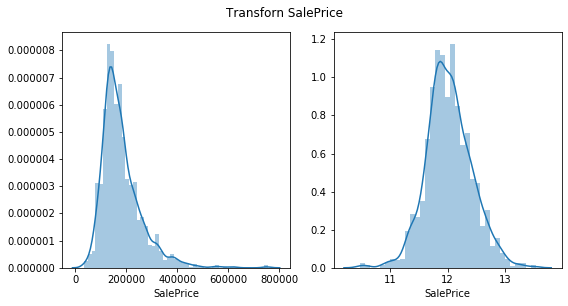

In [378]:
# Price distribution
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle("Transforn SalePrice", y=1.05)
sns.distplot(train_df["SalePrice"], ax=axs[0])
sns.distplot(np.log(train_df["SalePrice"]), ax=axs[1])
plt.tight_layout()

In [379]:
# convert price to log10 format
train_df["LogPrice"] = np.log(train_df["SalePrice"])

In [380]:
# sns.distplot(train_df[train_df["LogPrice"]<6]["LogPrice"])

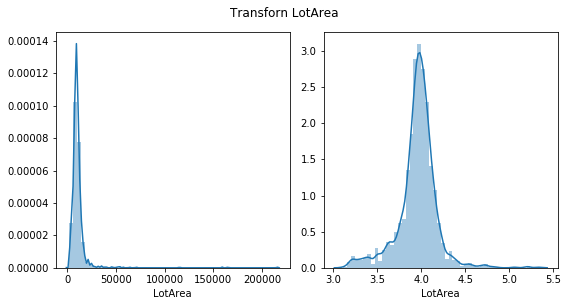

In [381]:
# LotArea distrib.
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle("Transforn LotArea", y=1.05)
sns.distplot(train_df["LotArea"], ax=axs[0])
sns.distplot(np.log10(train_df["LotArea"]), ax=axs[1])
plt.tight_layout()

In [382]:
train_df["LotArea"] = np.log10(train_df["LotArea"])

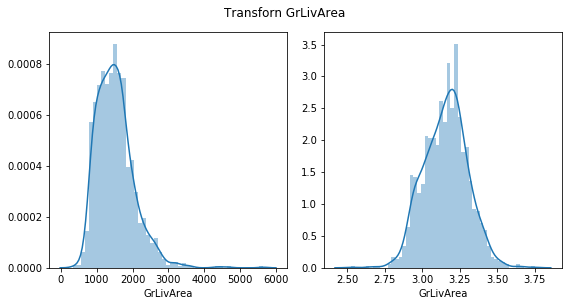

In [383]:
# GrLivArea 
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle("Transforn GrLivArea", y=1.05)
sns.distplot(train_df["GrLivArea"], ax=axs[0])
sns.distplot(np.log10(train_df["GrLivArea"]), ax=axs[1], bins=50)
plt.tight_layout()

<Figure size 720x288 with 0 Axes>

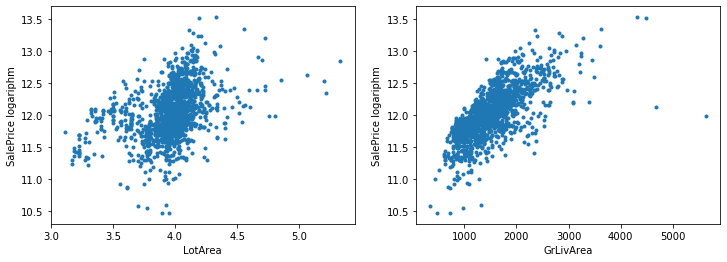

In [384]:

plt.figure(figsize=(10, 4))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

# fig.tight_layout()
ax1.set_xlabel("LotArea")
ax1.set_ylabel("SalePrice logariphm")
ax1.scatter(train_df["LotArea"], train_df["LogPrice"], marker='.')

ax2.set_xlabel("GrLivArea")
ax2.set_ylabel("SalePrice logariphm")
ax2.scatter(train_df["GrLivArea"], train_df["LogPrice"], marker='.')

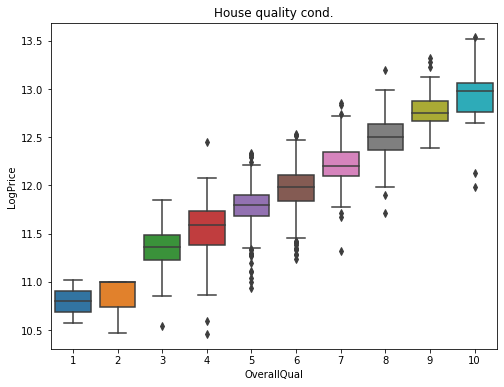

In [385]:
f, ax = plt.subplots(figsize=(8, 6))
plt.title("House quality cond.")
fig = sns.boxplot(x="OverallQual", y="LogPrice", data=train_df[["OverallQual", "LogPrice"]])

In [386]:
for qual_val in train_df["OverallQual"].unique():
    quantiles = train_df[train_df["OverallQual"]==qual_val]["LogPrice"].quantile([0.25, 0.5, 0.75])
    iqr = quantiles.loc[0.75] - quantiles.loc[0.25]

    # q[0.25] - 1.5*iqr
    expr1 = (train_df["OverallQual"]==qual_val) & (train_df["LogPrice"] <= quantiles[0.25] - 1.5*iqr)
    train_df.loc[expr1, "LogPrice"] = train_df[expr1]["LogPrice"].apply(lambda x: quantiles[0.25] + np.random.random() * iqr)
    
    # break
    # q[0.75] + 1.5*iqr
    expr2 = (train_df["OverallQual"]==qual_val) & (train_df["LogPrice"] >= quantiles[0.75] + 1.5*iqr)
    train_df.loc[expr2, "LogPrice"] = train_df[expr2]["LogPrice"].apply(lambda x: quantiles[0.25] + np.random.random() * iqr)

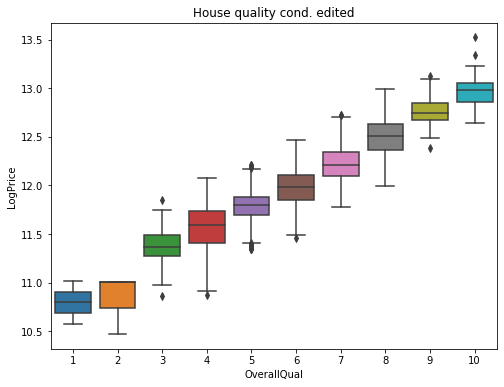

In [387]:
f, ax = plt.subplots(figsize=(8, 6))
plt.title("House quality cond. edited")
fig = sns.boxplot(x="OverallQual", y="LogPrice", data=train_df[["OverallQual", "LogPrice"]])

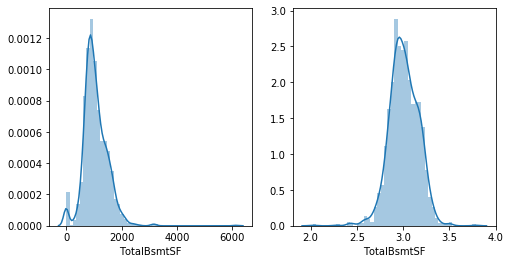

In [388]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.distplot(train_df["TotalBsmtSF"], ax=axes[0])
sns.distplot(np.log10(train_df.loc[train_df["TotalBsmtSF"]>0, "TotalBsmtSF"]), ax=axes[1])

In [389]:
# mark non-zero values for HasTotalBsmt
train_df["HasTotalBsmt"] = 0
train_df.loc[train_df["TotalBsmtSF"] > 0, "HasTotalBsmt"] = 1

In [390]:
train_df["TotalBsmtSF"] = np.log(train_df.loc[train_df["TotalBsmtSF"]>0, "TotalBsmtSF"])

In [391]:
train_df["TotalBsmtSF"] = train_df["TotalBsmtSF"].fillna(0)

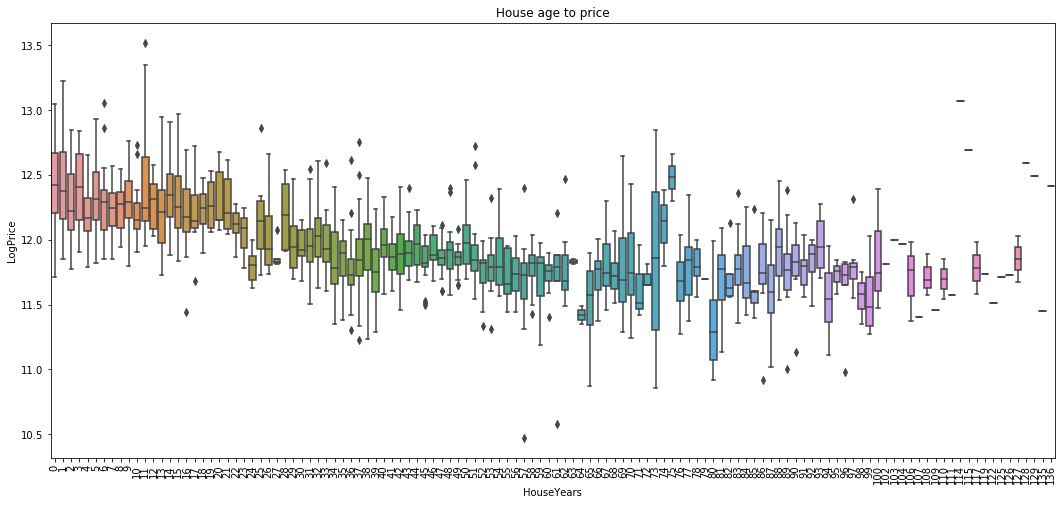

In [392]:
f, ax = plt.subplots(figsize=(18, 8))
plt.title("House age to price")
plt.xticks(rotation=90)
fig = sns.boxplot(x="HouseYears", y="LogPrice", data=train_df[["HouseYears", "LogPrice"]].sort_values(by=["LogPrice"]))

In [393]:
# Drop reformated columns
drop_cols = ["YearBuilt", "SalePrice"]
train_df = train_df.drop(columns=drop_cols) 

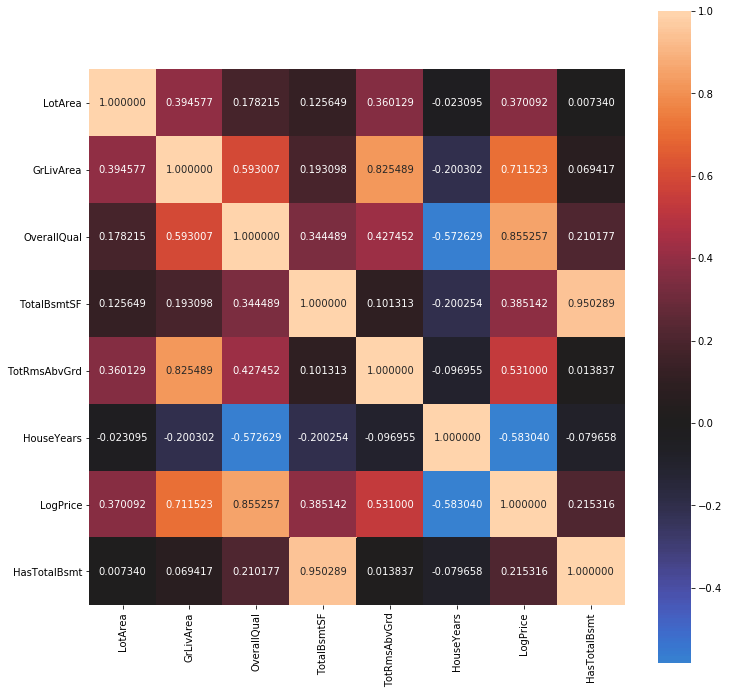

In [394]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, center=0, square=True, annot=True, fmt="f");

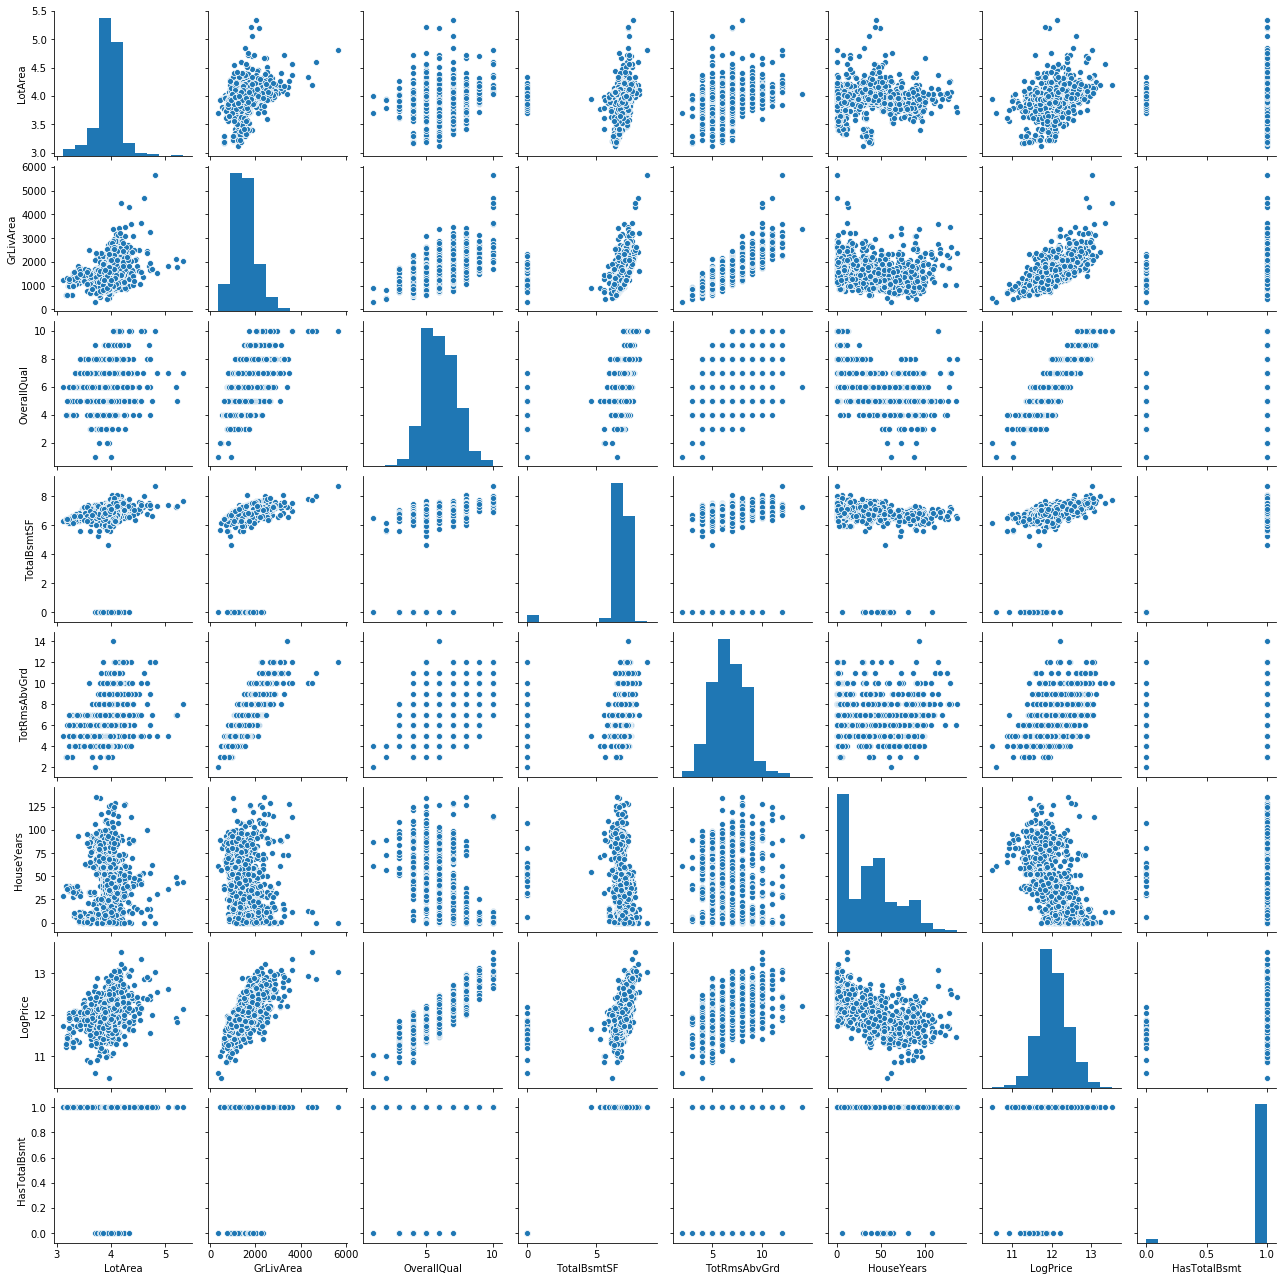

In [395]:
# plots per each parameter
sns.pairplot(train_df, height = 2.2)
plt.show();

In [396]:
# train_df[train_df["TotalBsmtSF"] == train_df["TotalBsmtSF"].min()]
# train_df["TotalBsmtSF"].sort_values()

In [397]:
# convert object dtype to categorical

# for column in train_df.columns:
#     # print(train_df[column].dtypes)
#     if train_df[column].dtypes == "object":
#         train_df[column] = pd.Categorical(train_df[column])
#         train_df[column] = train_df[column].cat.codes
train_df = pd.get_dummies(train_df)

In [398]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LotArea             1460 non-null   float64
 1   GrLivArea           1460 non-null   int64  
 2   OverallQual         1460 non-null   int64  
 3   TotalBsmtSF         1460 non-null   float64
 4   TotRmsAbvGrd        1460 non-null   int64  
 5   HouseYears          1460 non-null   int64  
 6   LogPrice            1460 non-null   float64
 7   HasTotalBsmt        1460 non-null   int64  
 8   MSZoning_C (all)    1460 non-null   uint8  
 9   MSZoning_FV         1460 non-null   uint8  
 10  MSZoning_RH         1460 non-null   uint8  
 11  MSZoning_RL         1460 non-null   uint8  
 12  MSZoning_RM         1460 non-null   uint8  
 13  Utilities_AllPub    1460 non-null   uint8  
 14  Utilities_NoSeWa    1460 non-null   uint8  
 15  LotConfig_Corner    1460 non-null   uint8  
 16  LotCon

In [399]:
na_cols = train_df.isna().sum()
na_cols[na_cols>0]

Series([], dtype: int64)

In [400]:
train_df.head(3)

,LotArea,GrLivArea,OverallQual,TotalBsmtSF,TotRmsAbvGrd,HouseYears,LogPrice,HasTotalBsmt,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,GarageType_870,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3.926857,1710,7,6.752270,8,5,12.247694,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3.982271,1262,6,7.140453,6,31,12.109011,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4.051153,1786,7,6.824374,6,7,12.317167,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


## Models

In [426]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

from sklearn.base import clone

In [420]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(columns="LogPrice"), train_df["LogPrice"], 
                                                    test_size=0.2, random_state=1)

In [421]:
X_train, y_train = train_df.drop(columns="LogPrice"), train_df["LogPrice"]

In [404]:
# print("train size", X_train.shape, "test size", X_test.shape) 

In [405]:
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse_score, greater_is_better=False)

In [406]:
def rmsle_cv(model, n_folds=5):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse = np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [277]:
models = {}

### Random Forest regressor

In [429]:
random_forest_params = {"n_estimators": (400, 500, 550),
                        "max_depth": np.arange(2, 8, 2),
                        "min_samples_split": np.arange(4, 12, 4),
                        "min_samples_leaf": np.arange(4, 12, 4)}

random_forest_grid = GridSearchCV(RandomForestRegressor(), random_forest_params, n_jobs=-1)

In [430]:
random_forest_grid.fit(X_train, y_train)
random_forest = random_forest_grid.best_estimator_
random_forest

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [431]:
# Must clone estimator for pipeline
random_forest_pipeline = make_pipeline(RobustScaler(), clone(random_forest))
random_forest_pipeline.fit(X_train.copy(deep=True), y_train.copy(deep=True))

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=3,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=8, min_samples_split=6,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=500, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start

In [432]:
print(f"R^2 score for RF with pipeline: {random_forest_pipeline.score(X_test, y_test):.5}")
print(f"R^2 score for RF: {random_forest.score(X_test, y_test):.5}")

R^2 score for RF with pipeline: 0.81419
R^2 score for RF: 0.81307


In [318]:
# random_forest_grid.score(X_test, y_test)

In [433]:
prediction = random_forest.predict(X_train)
rmse = rmse_score(y_train, prediction)
print(f"RMSE error for RandomForest: {rmse}")

RMSE error for RandomForest: 0.1755239701568135


In [434]:
rf_pipline_rmsle_error = rmsle_cv(random_forest_pipeline).mean()
rf_rmsle_error = rmsle_cv(random_forest).mean()
print("Random Forest")
print("Root mean squared log error with normalization", rf_pipline_rmsle_score)
print("Root mean squared log error without normalization", rf_rmsle_score)

Random Forest
Root mean squared log error with normalization 0.14439815168706882
Root mean squared log error without normalization 0.14389142766963375


In [435]:
models.update({"random_forest": random_forest_pipeline})

### GradientBoostingRegressor

In [436]:
gb_params = {"learning_rate": (0.1, 0.05),
             "n_estimators": (100, 200, 300),
             "subsample": (0.8, 1),
             "criterion": ("friedman_mse", "mse"),
             "min_samples_split": (2, 3),
             "min_samples_leaf": (1, 3, 5)}

gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_params, scoring=rmse_scorer, n_jobs=-1)

In [437]:
gb_grid.fit(X_train, y_train)
gb_model = gb_grid.best_estimator_
gb_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [438]:
gb_pipeline = make_pipeline(RobustScaler(), clone(gb_model))
gb_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.05, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=5,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=3

In [439]:
print(f"R^2 score for GB with pipeline: {gb_pipeline.score(X_test, y_test):.5}")
print(f"R^2 score for GB: {gb_model.score(X_test, y_test):.5}")

R^2 score for GB with pipeline: 0.92567
R^2 score for GB: 0.92709


In [440]:
gb_pipline_rmsle_error = rmsle_cv(gb_pipeline).mean()
gb_rmsle_error = rmsle_cv(gb_model).mean()
print("Gradient Boosting")
print("Root mean squared log error with normalization", gb_pipline_rmsle_error)
print("Root mean squared log error without normalization", gb_rmsle_error)

Gradient Boosting
Root mean squared log error with normalization 0.13683601263401482
Root mean squared log error without normalization 0.13663987255373847


In [441]:
models.update({"gradient_boosting": gb_pipeline})

### Elastic Net

In [442]:
elastic_net_params = {"alpha": (0.05, 0.1, 0.2),
                      "max_iter": (1000, 1500, 2000),
                      "normalize": (True, False)}
elastic_net_grid = GridSearchCV(ElasticNet(), elastic_net_params, scoring=rmse_scorer, n_jobs=-1)

In [443]:
elastic_net_grid.fit(X_train, y_train)
elastic_net_grid.best_estimator_

ElasticNet(alpha=0.05, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [444]:
elastic_net = elastic_net_grid.best_estimator_

In [445]:
elastic_net_pipeline = make_pipeline(RobustScaler(), clone(elastic_net))
elastic_net_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('elasticnet',
                 ElasticNet(alpha=0.05, copy_X=True, fit_intercept=True,
                            l1_ratio=0.5, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)

In [446]:
prediction = elastic_net.predict(X_train)
rmse = rmse_score(y_train, prediction)
print(f"RMSE error for Elastic Net: {rmse}")

RMSE error for Elastic Net: 0.15650354822995752


In [447]:
print(f"R^2 score for ElasticNet + normalization: {elastic_net_pipeline.score(X_test, y_test):.5}")
print(f"R^2 score for ElasticNet: {elastic_net.score(X_test, y_test):.5}")

R^2 score for ElasticNet + normalization: 0.85313
R^2 score for ElasticNet: 0.84773


In [448]:
elastic_net_pipline_rmsle_error = rmsle_cv(elastic_net_pipeline).mean()
elastic_net_rmsle_error = rmsle_cv(elastic_net).mean()
print("Elasticnet")
print("Root mean squared log error with normalization", elastic_net_pipline_rmsle_error)
print("Root mean squared log error without normalization", elastic_net_rmsle_error)

Elasticnet
Root mean squared log error with normalization 0.15407131649898237
Root mean squared log error without normalization 0.15686004801759917


In [449]:
models.update({"elastic_net": elastic_net_pipeline})

### BayesianRidge

In [450]:
br_model = BayesianRidge().fit(X_train, y_train)

In [451]:
prediction = br_model.predict(X_train)
rmse = rmse_score(y_train, prediction)
print(f"RMSE error for BayesianRidge: {rmse}")

RMSE error for BayesianRidge: 0.13761501571046666


In [452]:
br_pipeline = make_pipeline(RobustScaler(), clone(elastic_net))
br_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('elasticnet',
                 ElasticNet(alpha=0.05, copy_X=True, fit_intercept=True,
                            l1_ratio=0.5, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)

In [453]:
print(f"R^2 score for BayesianRidge + normalization: {br_pipeline.score(X_test, y_test):.5}")
print(f"R^2 score for BayesianRidge: {br_model.score(X_test, y_test):.5}")

R^2 score for BayesianRidge + normalization: 0.85313
R^2 score for BayesianRidge: 0.88376


In [454]:
br_pipline_rmsle_error = rmsle_cv(br_pipeline).mean()
br_rmsle_error = rmsle_cv(br_model).mean()
print("BayesianRidge")
print("Root mean squared log error with normalization", br_pipline_rmsle_error)
print("Root mean squared log error without normalization", br_rmsle_error)

BayesianRidge
Root mean squared log error with normalization 0.15407131649898237
Root mean squared log error without normalization 0.14163962023458415


In [455]:
models.update({"bayesian_ridge": br_model})

## Prepare test dataset

In [342]:
test_df = pd.read_csv(test_data_path)
test_df = test_df.set_index("Id")
test_cols = columns.copy()
test_cols.remove("SalePrice")
test_df = test_df[test_cols]
test_df.head(2)

,MSZoning,LotArea,GrLivArea,Utilities,LotConfig,BldgType,HouseStyle,OverallQual,YearBuilt,YrSold,ExterCond,TotalBsmtSF,HeatingQC,CentralAir,TotRmsAbvGrd,GarageType,SaleType
Id,,,,,,,,,,,,,,,,,
1461,RH,11622,896,AllPub,Inside,1Fam,1Story,5,1961,2010,TA,882.0,TA,Y,5,Attchd,WD
1462,RL,14267,1329,AllPub,Corner,1Fam,1Story,6,1958,2010,TA,1329.0,TA,Y,6,Attchd,WD


In [343]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1455 non-null   object 
 1   LotArea       1459 non-null   int64  
 2   GrLivArea     1459 non-null   int64  
 3   Utilities     1457 non-null   object 
 4   LotConfig     1459 non-null   object 
 5   BldgType      1459 non-null   object 
 6   HouseStyle    1459 non-null   object 
 7   OverallQual   1459 non-null   int64  
 8   YearBuilt     1459 non-null   int64  
 9   YrSold        1459 non-null   int64  
 10  ExterCond     1459 non-null   object 
 11  TotalBsmtSF   1458 non-null   float64
 12  HeatingQC     1459 non-null   object 
 13  CentralAir    1459 non-null   object 
 14  TotRmsAbvGrd  1459 non-null   int64  
 15  GarageType    1383 non-null   object 
 16  SaleType      1458 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 205.2+ KB


In [344]:
for column in test_df.columns.values:
    # if caontain empty values
    if test_df[column].isna().sum() > 0:
        # if it not number
        if test_df[column].dtypes == "object":
            # fill empty values to most popular
            test_df[column] = test_df[column].fillna(test_df[column].value_counts().iloc[0])
        else:
            # change to mean
            test_df[column] = test_df[column].fillna(test_df[column].mean())
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1459 non-null   object 
 1   LotArea       1459 non-null   int64  
 2   GrLivArea     1459 non-null   int64  
 3   Utilities     1459 non-null   object 
 4   LotConfig     1459 non-null   object 
 5   BldgType      1459 non-null   object 
 6   HouseStyle    1459 non-null   object 
 7   OverallQual   1459 non-null   int64  
 8   YearBuilt     1459 non-null   int64  
 9   YrSold        1459 non-null   int64  
 10  ExterCond     1459 non-null   object 
 11  TotalBsmtSF   1459 non-null   float64
 12  HeatingQC     1459 non-null   object 
 13  CentralAir    1459 non-null   object 
 14  TotRmsAbvGrd  1459 non-null   int64  
 15  GarageType    1459 non-null   object 
 16  SaleType      1459 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 205.2+ KB


In [345]:
# 

In [346]:
test_df["HouseYears"] = test_df["YrSold"] - test_df["YearBuilt"]
test_df = test_df.drop(columns=["YrSold", "YearBuilt"])

In [347]:
test_df["LotArea"] = np.log10(test_df["LotArea"])

In [348]:
# mark non-zero values for HasTotalBsmt
test_df["HasTotalBsmt"] = 0
test_df.loc[test_df["TotalBsmtSF"] > 0, "HasTotalBsmt"] = 1
test_df["TotalBsmtSF"] = np.log(test_df.loc[test_df["TotalBsmtSF"] > 0, "TotalBsmtSF"])
test_df["TotalBsmtSF"] = test_df["TotalBsmtSF"].fillna(0)

In [349]:
# convert object dtype to categorical

# for column in test_df.columns:
#     if test_df[column].dtypes == "object":
#         test_df[column] = pd.Categorical(test_df[column])
#         test_df[column] = test_df[column].cat.codes
test_df = pd.get_dummies(test_df)

In [350]:
test_df.head(3)

,LotArea,GrLivArea,OverallQual,TotalBsmtSF,TotRmsAbvGrd,HouseYears,HasTotalBsmt,MSZoning_1114,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_1457,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,GarageType_853,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_1258,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,4.065281,896,5,6.782192,5,49,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1462,4.154333,1329,6,7.192182,6,52,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1463,4.140822,1629,5,6.833032,6,13,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [351]:
# fill empty data which not contains in test
no_data_columns = np.setdiff1d(train_df.columns.drop("LogPrice").values, test_df.columns.values)
for col in no_data_columns.tolist():
    test_df[col] = 0

In [352]:
# check data
np.setdiff1d(train_df.columns.drop("LogPrice").values, test_df.columns.values)

array([], dtype=object)

In [353]:
# reorder test data like in train data
test_df = test_df.reindex(columns=train_df.columns.drop("LogPrice").values)
print(test_df.columns[:5], train_df.columns[:5])

Index(['LotArea', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'TotRmsAbvGrd'], dtype='object') Index(['LotArea', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'TotRmsAbvGrd'], dtype='object')


## Predictions

### random forest reg. prediction

In [354]:
test_pred = random_forest_grid.predict(test_df)
test_pred = np.power(np.e, test_pred, )
test_pred[:5]

array([491460.58962022, 491251.56828886, 491608.81742058, 491608.81742058,
       491460.58962022])

### elasticNet prediction

In [355]:
test_pred = elastic_net_pipeline.predict(test_df)
test_pred = np.power(np.e, test_pred, )
test_pred[:5]

array([130997.05202383, 164653.51692967, 163301.92287819, 178555.0049909 ,
       201517.59249814])

###  BayesianRidge

In [356]:
test_pred = br_model.predict(test_df)
test_pred = np.power(np.e, test_pred)
test_pred[:5]

array([123445.6273176 , 161078.62131793, 160017.02281637, 179088.22558138,
       209685.11892758])

## Write results

In [361]:
# common_predictions = np.zeros(test_df.shape[0])
# for model_name in models:
#     common_predictions += models[model_name].predict(test_df)

# common_predictions /= len(models.keys())
# common_predictions = np.power(np.e, common_predictions)
# common_predictions[:5]

In [365]:
common_predictions = (models["gradient_boosting"].predict(test_df) + models["random_forest"].predict(test_df)) / 2
common_predictions = np.power(np.e, common_predictions)
common_predictions[:5]

array([126744.78483063, 158319.9452158 , 158484.65800794, 179264.34733737,
       207127.97549337])

In [366]:
pd.DataFrame({"SalePrice": common_predictions}, index=test_df.index).to_csv("gb_rf.csv")